This tutorial will show how to use and modify the data generator pack for Tacton.
Data objects that are relevant for this project are:
C_data - Combination data, 
D_data - Discount data, 
p_data - probability data, 
deal_data - Quote outcome. 
For more information regarding the algorithms behind the data generator: 
https://docs.google.com/document/d/10QUrTwTu61wxq57S-zQgsrRc2BtC6QuKa8mXj4Q4f84/edit

In [1]:
import numpy as np
from matplotlib import pylab as plt
from generate_cpq_data_class import *


The Generator_pack creates a C-gen (Combinations/dimensions-generator), D_gen (Discount-generator), a P (Probability function) and a corresponding P_gen (Probability-generator).

We start this tutortial by initiate a Generator_pack G. discount_max, discount_min, discount_mean, discount_std are parameters for the distribution of the discount data (truncated normal distribution). mean_p and max_p are parameters for the probability distribution. 

In [2]:
G=Generator_pack(discount_max = 0.4, discount_min=0, discount_mean = 0.15, discount_std = 0.2, mean_p = 0.2,
                  max_p = 0.4)



To generate C-data, D-data, p_data and deal_data from the Generator_pack G we just call G.generate_data()

In [3]:
C_data, D_data, p_data, deal_data = G.generate_data(copyfunction=lambda: int(np.maximum(0,np.random.normal(1,0.2))))


Generated data:  3169 / 3169


In [4]:
print("C_data shape: ", C_data.shape)
print("D_data shape: ", D_data.shape)
print("p_data shape: ", p_data.shape)
print("deal_data shape: ", deal_data.shape)

C_data shape:  (3105, 30)
D_data shape:  (3105,)
p_data shape:  (3105,)
deal_data shape:  (3105,)


Here we show plots of the p(d) function for some C values.

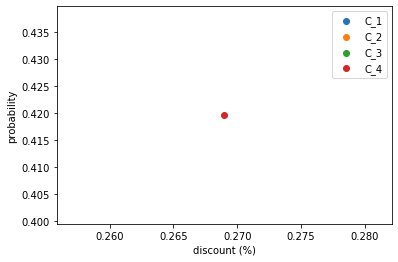

In [5]:
C_1 = [3,3,1,1,8,0]
C_1_oh = one_hot(C_1)
ind1 = np.where(np.array([list(C_) == list(C_1_oh) for C_ in C_data]))
C_2 = [3,3,1,1,8,1]
C_2_oh = one_hot(C_2)
ind2 = np.where(np.array([list(C_) == list(C_2_oh) for C_ in C_data]))
C_3 = [0,1,0,3,2,2]
C_3_oh = one_hot(C_3)
ind3 = np.where(np.array([list(C_) == list(C_3_oh) for C_ in C_data]))

C_4 = [0,1,0,3,11,2]
C_4_oh = one_hot(C_4)
ind4 = np.where(np.array([list(C_) == list(C_4_oh) for C_ in C_data]))
#plt.scatter(D_data, p_data, alpha =0.1, label='all C')

plt.scatter(D_data[ind1], p_data[ind1],label='C_1')
plt.scatter(D_data[ind2], p_data[ind2],label='C_2')
plt.scatter(D_data[ind3], p_data[ind3],label='C_3')
plt.scatter(D_data[ind4], p_data[ind4],label='C_4')
plt.xlabel('discount (%)')
plt.ylabel('probability')
plt.legend()
plt.show()
plt.close()

part  0 :  0.084 * sigmoid( 81.331  * d -  11.708 , center at d =  0.144
part  1 :  0.069 * sigmoid( 66.878  * d -  7.772 , center at d =  0.116
part  2 :  0.1 * sigmoid( 58.414  * d -  12.848 , center at d =  0.22
part  3 :  0.117 * sigmoid( 51.054  * d -  11.168 , center at d =  0.219
part  4 :  0.156 * sigmoid( 71.296  * d -  1.504 , center at d =  0.021


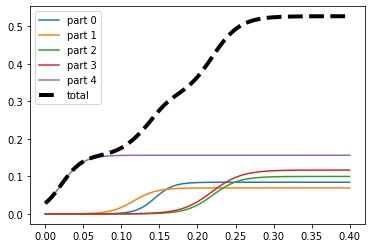

In [6]:
G.P.get_p_data(C_1,plot=True)

part  0 :  0.097 * sigmoid( 80.636  * d -  10.387 , center at d =  0.129
part  1 :  0.075 * sigmoid( 78.603  * d -  12.11 , center at d =  0.154
part  2 :  0.107 * sigmoid( 56.952  * d -  9.323 , center at d =  0.164
part  3 :  0.128 * sigmoid( 50.025  * d -  16.836 , center at d =  0.337
part  4 :  0.158 * sigmoid( 63.929  * d -  9.088 , center at d =  0.142


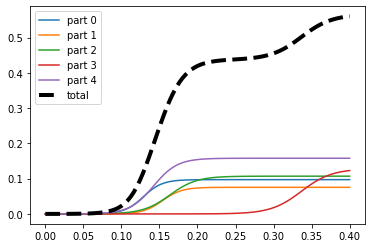

In [7]:
G.P.get_p_data(C_2,plot=True)

part  0 :  0.091 * sigmoid( 40.178  * d -  7.868 , center at d =  0.196
part  1 :  0.09 * sigmoid( 43.916  * d -  3.18 , center at d =  0.072
part  2 :  0.139 * sigmoid( 49.351  * d -  12.274 , center at d =  0.249
part  3 :  0.078 * sigmoid( 76.605  * d -  8.418 , center at d =  0.11
part  4 :  0.096 * sigmoid( 67.291  * d -  8.694 , center at d =  0.129


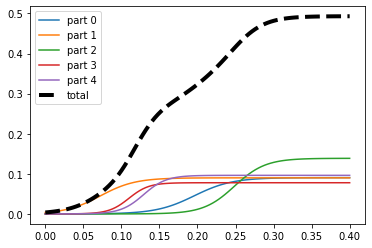

In [8]:
C_3 = [0,1,0,3,2,2]

G.P.get_p_data(C_3,plot=True)

## Manipulate the p(d) function for a specific C
We update the p(d) function for C_3 = [0,1,0,3,2,2]. The function call is G.set_C(C,p,n,d), 
### Parameters:
- C - the dimension you want to update (you can write C in both standard form or one hot)
- p - probability function of d. Simplest way of writting function calls is by using lambda expression.
- n - frequncy function. Nr of times you want C to appear in the data. The example below "n = lambda: 100" always returns 100 data points of C when calling G.generate_data()
- d_dist - distribution function of d for C. The example below "d_dist = lambda nr: 0.4*np.random.rand(nr)" returns a random value between 0-0.4 (Uniform distribution). If you want other ranges for d_dist e.g. range: mind - maxd, call "d_dist = lambda nr: np.random.rand(nr)*(maxd - mind) + mind".

If you don't want specify p, n or d_dist you can safely ignore them.


In [9]:
G.set_C(C_3, p=lambda d:np.sin(d*np.pi/0.4), n= lambda: 2, d_dist= lambda nr: 0.4*np.random.rand(nr))

Add another special C to G and create a p value that maximize at d=0.5

In [18]:
C_1 = [3,3,1,1,8,0]
G.set_C(C_1, p=lambda d: -100*(d-0.25)**2*step(0.4-d), n= lambda: 2, d_dist= lambda nr: 0.4*np.random.rand(nr))

We can now generate new data with the updated settings 

In [25]:
C_data, D_data, p_data, deal_data = G.generate_data(copyfunction=lambda: int(np.maximum(0,np.random.normal(0,0.1))))


Generated data:  202 / 202
p shape:  (202,) p dtype:  float64
0.8780298607747482  - type:  <class 'numpy.float64'>
0.9999817253498577  - type:  <class 'numpy.float64'>
0.7269042450681227  - type:  <class 'numpy.float64'>
0.6625310166358496  - type:  <class 'numpy.float64'>
0.2740615745979414  - type:  <class 'numpy.float64'>
0.726946231813125  - type:  <class 'numpy.float64'>
0.6168298008657986  - type:  <class 'numpy.float64'>
0.45892296739206856  - type:  <class 'numpy.float64'>
0.7268520716275431  - type:  <class 'numpy.float64'>
0.6716029657653724  - type:  <class 'numpy.float64'>
0.2329337586643742  - type:  <class 'numpy.float64'>
0.36425360582116567  - type:  <class 'numpy.float64'>
0.5095750707907514  - type:  <class 'numpy.float64'>
0.7110605929953033  - type:  <class 'numpy.float64'>
0.4951414092402659  - type:  <class 'numpy.float64'>
0.3469184409341538  - type:  <class 'numpy.float64'>
0.28475782186149273  - type:  <class 'numpy.float64'>
0.3694202995760957  - type:  <class

extract the datapoints where C_data == C_3

In [16]:
C_3 = [0,1,0,3,2,2]
C_3_oh = one_hot(C_3)
ind3 = np.where(np.array([list(C_) == list(C_3_oh) for C_ in C_data]))
print("C_data[ind3] shape: ", C_data[ind3].shape)
print("C data shape: ", C_data.shape)

C_data[ind3] shape:  (2, 30)
C data shape:  (4, 30)


Plot the probability p as a function of D_data for some C configurations.

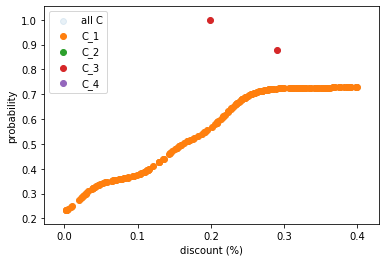

In [26]:
C_1 = [3,3,1,1,8,0]
C_1_oh = one_hot(C_1)
ind1 = np.where(np.array([list(C_) == list(C_1_oh) for C_ in C_data]))
C_2 = [3,3,1,1,8,1]
C_2_oh = one_hot(C_2)
ind2 = np.where(np.array([list(C_) == list(C_2_oh) for C_ in C_data]))
C_3 = [0,1,0,3,2,2]
C_3_oh = one_hot(C_3)
ind3 = np.where(np.array([list(C_) == list(C_3_oh) for C_ in C_data]))

C_4 = [0,1,0,3,11,2]
C_4_oh = one_hot(C_4)
ind4 = np.where(np.array([list(C_) == list(C_4_oh) for C_ in C_data]))
plt.scatter(D_data, p_data, alpha =0.1, label='all C')

plt.scatter(D_data[ind1], p_data[ind1],label='C_1')
plt.scatter(D_data[ind2], p_data[ind2],label='C_2')
plt.scatter(D_data[ind3], p_data[ind3],label='C_3')
plt.scatter(D_data[ind4], p_data[ind4],label='C_4')
plt.xlabel('discount (%)')
plt.ylabel('probability')
plt.legend()
plt.show()
plt.close()

KeyboardInterrupt: 

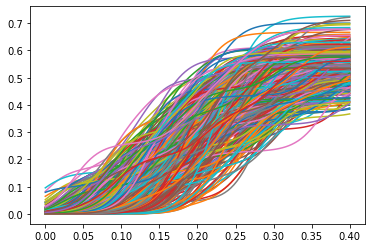

In [14]:
C_combinations = G.C_gen(complete_set=True, copys=1)
dl = np.linspace(0,0.4,101)
itt=0
for C in C_combinations[::1]:
    C_ = np.tile(np.expand_dims(C,0),(101,1))
    #print("C_ shape: ", C_.shape)
    pC = np.squeeze(G.P.p(C_,dl,no_print=True))
    #print("pC shape: ", pC.shape)
    plt.plot(dl,pC)
    itt+=1
    if itt%100==0:
        print("itt: ", itt, end="\r", flush=True)
plt.show()

pp shape:  (101,)  -  float64


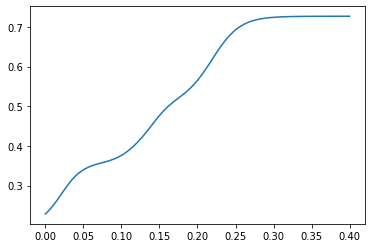

In [24]:


new_p = lambda d: np.float64(G.P.base_func(to_scalar(C_1), d)+0.2)
dl = np.linspace(0,0.4,101)
pp = new_p(dl)
print("pp shape: ", pp.shape, " - ", pp.dtype)
plt.plot(dl,pp)

G.set_C(C_1, p=new_p, n= lambda: 200, d_dist= lambda nr: 0.4*np.random.rand(nr))